<a href="https://colab.research.google.com/github/nikhil-xyz/ImageClassification/blob/main/Image_Classification_Cat_Vs_Dog_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!git clone https://github.com/nikhil-xyz/ImageClassification.git

Cloning into 'ImageClassification'...
remote: Enumerating objects: 10254, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (237/237), done.
remote: Total 10254 (delta 8), reused 226 (delta 2), pack-reused 10013
Receiving objects: 100% (10254/10254), 268.66 MiB | 29.45 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Checking out files: 100% (10246/10246), done.


In [9]:
!mkdir -p ~/.kaggle
!cp ImageClassification/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d tongpython/cat-and-dog

 89% 195M/218M [00:01<00:00, 150MB/s]
100% 218M/218M [00:01<00:00, 143MB/s]


In [11]:
import zipfile 
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
data_dir_train = tf.keras.utils.get_file('/content/training_set/training_set', origin='')

In [13]:
data_dir_train

'/content/training_set/training_set'

In [14]:
import pathlib
data_dir_train = pathlib.Path(data_dir_train)
data_dir_train

PosixPath('/content/training_set/training_set')

In [15]:
len(list(data_dir_train.glob('*/*.jpg')))

8005

In [16]:
cats = list(data_dir_train.glob('cats/*.jpg'))
cats[:5]

[PosixPath('/content/training_set/training_set/cats/cat.2023.jpg'),
 PosixPath('/content/training_set/training_set/cats/cat.2067.jpg'),
 PosixPath('/content/training_set/training_set/cats/cat.3558.jpg'),
 PosixPath('/content/training_set/training_set/cats/cat.3760.jpg'),
 PosixPath('/content/training_set/training_set/cats/cat.2635.jpg')]

In [17]:
!pip install Pillow
# import Pillow
# Pillow.Image.open(str(cats[0]))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import PIL

In [19]:
train_image_dict = {
    'cat' : list(data_dir_train.glob('cats/*')),
    'dog' : list(data_dir_train.glob('dogs/*')),
}
train_category = {
    'cat' : 0,
    'dog' : 1,
}

In [20]:
len(train_image_dict['cat'])

4001

In [21]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import cv2

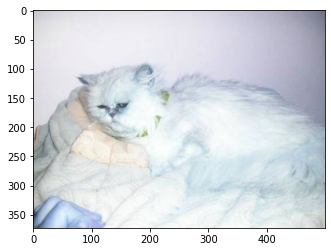

In [23]:
img = cv2.imread(str(train_image_dict['cat'][3]))
plt.imshow(img)

In [ ]:
img[0][0].shape

(3,)

In [24]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [25]:
x_train, y_train = [], []
for images, label in train_image_dict.items():
  for image in label:
    img = cv2.imread(str(image))
    try:
      resized_img = cv2.resize(img,(180,180))
    except:
      break
    x_train.append(resized_img)
    y_train.append(train_category[images])

In [ ]:
y_train[:5]

[0, 0, 0, 0, 0]

In [26]:
data_dir_test = tf.keras.utils.get_file('/content/test_set/test_set', origin='')

In [27]:
data_dir_test = pathlib.Path(data_dir_test)

In [28]:
len(list(data_dir_test.glob('*/*.jpg')))

2023

In [29]:
test_image_dict = {
    'cat' : list(data_dir_test.glob('cats/*')),
    'dog' : list(data_dir_test.glob('dogs/*')),
}
test_category = {
    'cat' : 0,
    'dog' : 1,
}

In [30]:
x_test, y_test = [], []
for images, label in test_image_dict.items():
  for image in label:
    img = cv2.imread(str(image))
    try:
      resized_img = cv2.resize(img,(180,180))
    except:
      break
    x_test.append(resized_img)
    y_test.append(test_category[images])

In [31]:
y_test[860:870]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [32]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [33]:
len(x_train)

7947

In [ ]:
len(y_train)

6522

In [ ]:
len(x_test)

1657

In [ ]:
len(y_test)

1657

In [34]:
x_train = x_train / 255
x_test = x_test / 255

In [35]:
data_augmentation = keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [36]:
from keras import layers
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.45),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

In [37]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


249/249 [==============================] - 294s 1s/step - loss: 0.6673 - accuracy: 0.5909
Epoch 2/10
249/249 [==============================] - 291s 1s/step - loss: 0.5934 - accuracy: 0.6835
Epoch 3/10
249/249 [==============================] - 287s 1s/step - loss: 0.5620 - accuracy: 0.7071
Epoch 4/10
249/249 [==============================] - 285s 1s/step - loss: 0.5336 - accuracy: 0.7317
Epoch 5/10
249/249 [==============================] - 286s 1s/step - loss: 0.5163 - accuracy: 0.7413
Epoch 6/10
249/249 [==============================] - 285s 1s/step - loss: 0.4956 - accuracy: 0.7603
Epoch 7/10
249/249 [==============================] - 285s 1s/step - loss: 0.4820 - accuracy: 0.7665
Epoch 8/10
249/249 [==============================] - 286s 1s/step - loss: 0.4692 - accuracy: 0.7768
Epoch 9/10
249/249 [==============================] - 285s 1s/step - loss: 0.4614 - accuracy: 0.7826
Epoch 10/10
249/249 [==============================] - 285s 1s/step - loss: 0.4408 - accuracy: 0.7944


In [ ]:
model.evaluate(x_test, y_test)

52/52 [==============================] - 15s 286ms/step - loss: 0.4774 - accuracy: 0.7749


[0.4773620367050171, 0.7748944163322449]